# Artificial Intelligence UE
## pig_lite

In this class we are going to work with a small framework called `pig_lite`. `pig` stands for Problem Instance Generation and `pig_lite` is a simplified version of the framework that we have used in previous years. The main purpose of this framework is to generate problems that can be used to test your algorithms.

The purpose of this notebook is to show you how to work with `pig_lite`, and more specifically, with instances of the class `Problem`.

In [1]:
import numpy as np
import random

from pig_lite.problem.base import Problem
from pig_lite.instance_generation.problem_factory import ProblemFactory

### Creating problems

For generating problems we first need an object of the class `ProblemFactory`.

In [2]:
factory = ProblemFactory()

#### Create a random problem

The function `generate_problem` takes three parameters:
- problem_type: for now we are going to use `maze` (but you can also try `terrain` and `rooms`)
- problem_size: the size of the problems, for a maze this means the width and height
- random generator

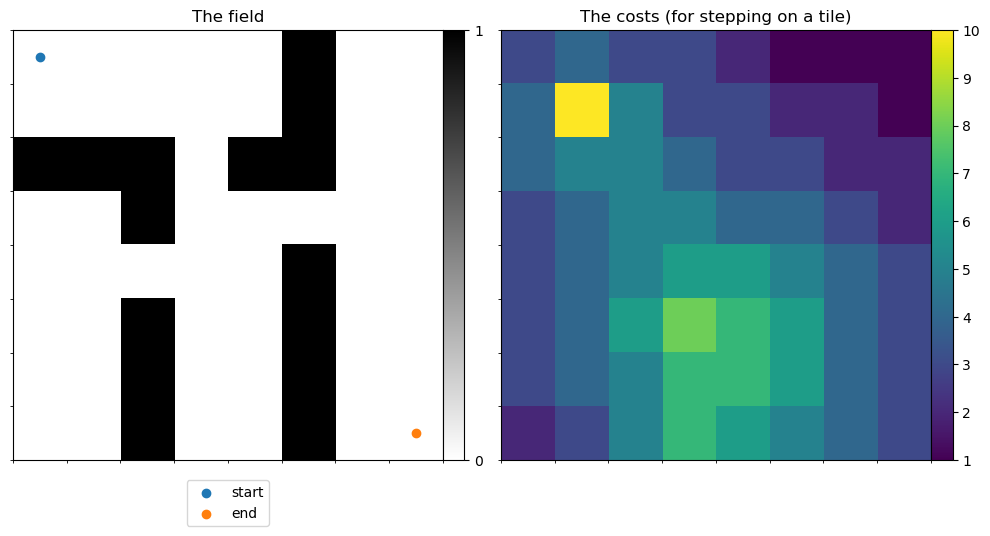

In [3]:
rng = np.random.RandomState(seed=123)

problem = factory.generate_problem('rooms', 8, rng)
problem.visualize()

### Read a previously stored problem from a JSON file

The function `create_problem_from_json` takes the file path of a stored problem instance as a parameter.

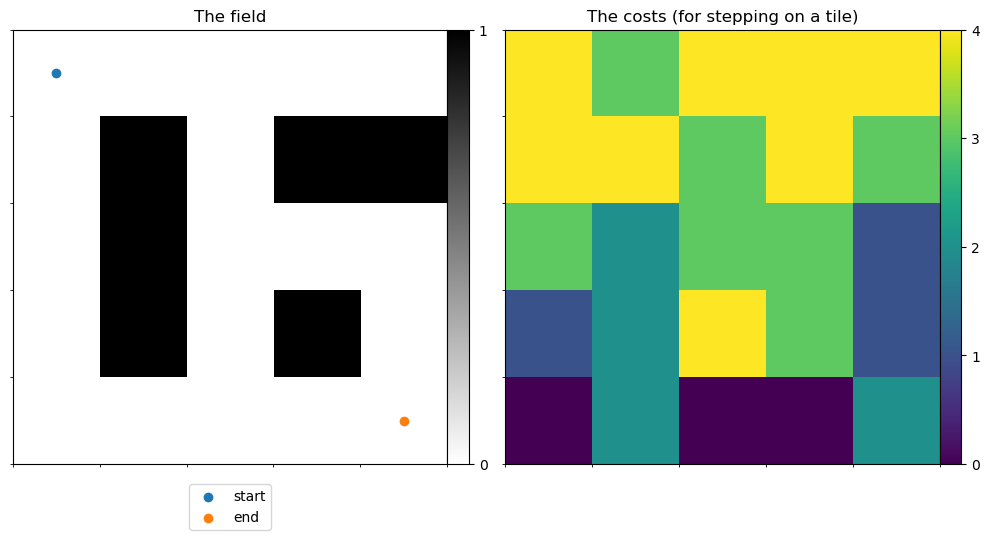

In [4]:
problem = factory.create_problem_from_json('boards/tiny0.json')
problem.visualize()

#### Create a problem manually

We can also manully create problem by passing a dictionary that contains the keys `board`, `costs`, `start_state`, and `end_state`. Here you might notice that transposed versions of the board and costs are visualized.

In [ ]:
data = {
    'board': [
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 0]
    ],
    'costs': [
        [9, 9, 9],
        [9, 0, 9],
        [9, 0, 9]
    ],
    'start_state': [0, 0],
    'end_state': [2, 2]
}

problem = factory.create_problem_from_dict(data)
problem.visualize()

## Interacting with problems

Let's create a small problem named `maze`:

In [ ]:
maze = factory.generate_problem('maze', 8, rng)
maze.visualize()

**Practical Hints:**
- Use 'maze.get_start_node()' to get the node with the start state.
- Use 'maze.is_end(node)' to check whether 'node' is the node with the end state.
- Use 'maze.successors(node)' to get a list of nodes containing successor states. Successors will be returned in the order that they can be reached using the following actions: R(ight), U(p), D(own), L(eft) (omitting actions that will cause the agent to bump into the wall). 

In the following these methods are shown for a problem named `maze`:

In [ ]:
# - use 'problem.get_start_node()' to get the node with the start state
maze.get_start_node()

In [ ]:
# - use 'problem.is_end(node)' to check whether 'node' is the node with the end state
maze.is_end(maze.get_start_node())

In [ ]:
# - use 'problem.successors(node)' to get a list of nodes containing successor states
maze.successors(maze.get_start_node())

## Provided data structures

<p><strong>Usage of provided datatypes:</strong></p>

*Queue:*
- to put an item in the the Queue, use `fringe.put(<item>)`
- to get an item out of the Queue, use `fringe.get()`
- to check whether there are any elements in the Queue, use `fringe.has_elements()`

*Stack:*
- to put an item in the the Stack, use `fringe.put(<item>)`
- to get an item out of the Stack, use `fringe.get()`
- to check whether there are any elements in the Stack, use `fringe.has_elements()`

*PriorityQueue:*
- to put an item into the PriorityQueue, use `fringe.put(<priority>, <item>)`
- to get an item out of the PriorityQueue, use `fringe.get()`
- to check whether there are any elements in the PriorityQueue, use `fringe.has_elements()`

Let's have a look at a queue:

In [ ]:
from pig_lite.datastructures.queue import Queue

queue = Queue()

# does the newly created queue have elements?
queue.has_elements()


In [ ]:
# let's store the start node of the previously created maze in the queue
queue.put(maze.get_start_node())

# does the queue have elements now?
queue.has_elements()

In [ ]:
# let's retrieve an item from the queue
item = queue.get()

# (and print it for the fun of it)
print(item)

In [ ]:
# does the queue have elements now?
queue.has_elements()

# Implementing a search algorithm

Here we demonstrate how a search algorithm will look like based on a very dumb search, namely *Random Search*.

In [ ]:
class RS(object):
    def solve(self, problem: Problem):
        current = problem.get_start_node()

        while not problem.is_end(current):       # as long as the current node is not the end
            nodes = problem.successors(current)  # get the successor nodes for the current node
            current = random.choice(nodes)       # choose a random successor node
        return current
    

In the following we instantiate the search algorithm `RS` and call the function `solve()`.

In [ ]:
rs_search = RS()
rs_solution = rs_search.solve(maze)

# Since this random search is not very smart and might revisit previous states,
# you might receive a warning "overflow encountered in scalar add node.cost + cost"

We provide you with a method to print information about the found solution:

In [ ]:
rs_solution.pretty_print()

## Visualizing the solution

Now you can also visualize the found path on top of the maze:

In [ ]:
maze.visualize(sequences=[('rs', rs_solution.get_action_sequence())])

This also works for several sequences, e.g.: 
```
maze.visualize(sequences=[('rs', rs_solution.get_action_sequence()), ('bfs', bfs_solution.get_action_sequence())])
```
or even a manually created one:

In [ ]:
maze.visualize(sequences=[('rs', rs_solution.get_action_sequence()),
                          ('test', ['R', 'R', 'D', 'D', 'D', 'L', 'U', 'R', 'D', 'D', 'R', 'D', 'D', 'R', 'R', 'R'])])

## Basic Tests

After the cell where you have to implement a search algorithm, there will be cells with some basic tests like the following. These tests and the additonal tests at the end of the assignment notebook will determine the points for the assignment.

In [ ]:
# this is a testing cell, do not edit or delete

assert(rs_solution is not None)

Now you should know everything about the framework that you need to solve the assignment in `uninformed_search.ipynb`.

**Feel free to play around with the mazes and functions in this notebook!**